**Background Introduction**

This notebook contains a training task to seperate the good quality animal images and bad quality images. The data are found from the website 'data for everyone'. There are more than 3000 animal images with people's thought about are these animal images good enough for a magazine or not. 

The original images have different pixel sizes. Though it is definite that images with lower pixel size won't be considered good enough, here I would not talk about it. I will more focus on how does the image look like make people have the thought.

I will start with Convnet to train images based on the code from 'Deep Learning with Python'.

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Store the directory saving images

In [0]:
pwd = '/content/drive/My Drive/Colab Notebooks/Thesis/data/animal_resized/*.jpg'
base = '/content/drive/My Drive/Colab Notebooks/Thesis/data/animal_resized/'

Read basic packages we need to rearrange images and read images

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import pandas as pd

import os, shutil

Read all images' names and read people's response rank respect to the images.

1587    3.2
1593    3.0
3384    3.5
388     3.0
2930    4.6
405     2.4
3390    4.0
2918    3.4
149     3.4
1034    3.0
Name: how_beautiful_is_this_picture, dtype: float64
The mean of the ratio rank: 3.485028


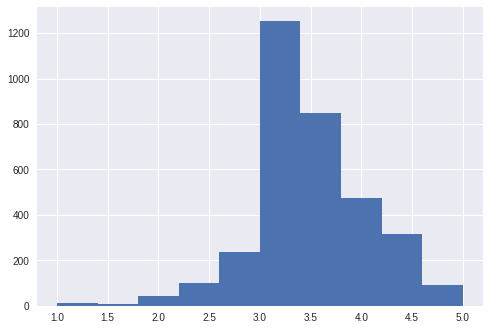

In [4]:
img = glob.glob(pwd) # Read all image's name
idx = [int(a.split('imgresize_')[1].split('.')[0]) for a in img] # Get all indexes used
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Thesis/data/How-beautiful-animals-DFE.csv')
ratio_rank = df['how_beautiful_is_this_picture'][idx]
print(ratio_rank.head(10))
plt.hist(ratio_rank) # The density plot of people's respond
print('The mean of the ratio rank: %f' %np.mean(ratio_rank))

The images with rank number below the average ranke will be considered as bad ones. Oterwise are the good ones.  There are 1710 good quality images and 1671 bad quality images.

In [5]:
label = np.zeros(len(ratio_rank))
label[ratio_rank>np.mean(ratio_rank)]=1
label[ratio_rank<=np.mean(ratio_rank)]=-1

print('Good Quality Number: %d' %sum(label==1))
print('Bad Quality Number: %d' %sum(label==-1))

idx_good = [i for i,x in enumerate(label==1) if x]
idx_bad = [i for i,x in enumerate(label==-1) if x]
good_img = np.array(img)[idx_good]
bad_img = np.array(img)[idx_bad]

Good Quality Number: 1710
Bad Quality Number: 1671


**Visualize examples of good images and bad images**

The image I use here has already been resized to 256$\times$256 pixels. 

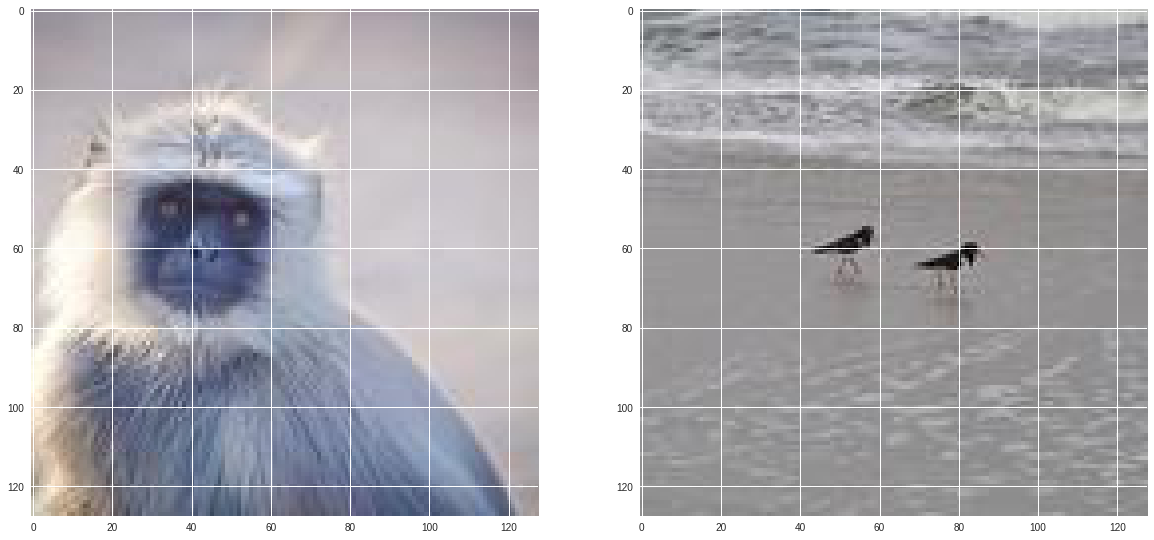

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

good_ex = mpimg.imread(good_img[0])
bad_ex = mpimg.imread(bad_img[20])

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(1,2,1)
plt.imshow(good_ex)
ax = fig.add_subplot(1,2,2)
plt.imshow(bad_ex)

Set up the directory names for training set, validation set and the testing set. Each set contains two folders, which are good folder to store good images and bad folder to store bad images.

In [0]:
train_dir = os.path.join(base,'train')
train_good_dir = os.path.join(train_dir,'good')
train_bad_dir = os.path.join(train_dir,'bad')

test_dir = os.path.join(base,'test')
test_good_dir = os.path.join(test_dir,'good')
test_bad_dir = os.path.join(test_dir,'bad')

validation_dir = os.path.join(base,'validation')
validation_good_dir = os.path.join(validation_dir,'good')
validation_bad_dir = os.path.join(validation_dir,'bad')

**Make the directory for Training, Testing and Validation dataset**

This code you only need to run once. If the directory exists already, there will be error.

In [0]:
os.mkdir(train_dir)
os.mkdir(train_good_dir)
os.mkdir(train_bad_dir)

os.mkdir(test_dir)
os.mkdir(test_good_dir)
os.mkdir(test_bad_dir)

os.mkdir(validation_dir)
os.mkdir(validation_good_dir)
os.mkdir(validation_bad_dir)

**Move the data image to the folders we already created**

This code you only need to run once. If the directory exists already, there will be error.

In [0]:
img_names = [a for a in good_img[range(900)]]
for im in img_names:
  id = int(im.split('imgresize_')[1].split('.')[0])
  newname = 'good_%d.jpg'%id
  dst = os.path.join(train_good_dir,newname)
  shutil.copyfile(im,dst)

In [0]:
img_names = [a for a in good_img[range(900,1350)]]
for im in img_names:
  id = int(im.split('imgresize_')[1].split('.')[0])
  newname = 'good_%d.jpg'%id
  dst = os.path.join(validation_good_dir,newname)
  shutil.copyfile(im,dst)

In [0]:
img_names = [a for a in good_img[range(1350,1710)]]
for im in img_names:
  id = int(im.split('imgresize_')[1].split('.')[0])
  newname = 'good_%d.jpg'%id
  dst = os.path.join(test_good_dir,newname)
  shutil.copyfile(im,dst)

In [0]:
img_names = [a for a in bad_img[range(900)]]
for im in img_names:
  id = int(im.split('imgresize_')[1].split('.')[0])
  newname = 'bad_%d.jpg'%id
  dst = os.path.join(train_bad_dir,newname)
  shutil.copyfile(im,dst)

In [0]:
img_names = [a for a in bad_img[range(900,1350)]]
for im in img_names:
  id = int(im.split('imgresize_')[1].split('.')[0])
  newname = 'bad_%d.jpg'%id
  dst = os.path.join(validation_bad_dir,newname)
  shutil.copyfile(im,dst)

In [0]:
img_names = [a for a in bad_img[range(1350,1671)]]
for im in img_names:
  id = int(im.split('imgresize_')[1].split('.')[0])
  newname = 'bad_%d.jpg'%id
  dst = os.path.join(test_bad_dir,newname)
  shutil.copyfile(im,dst)

In [16]:
print('Total training good images:',len(os.listdir(train_good_dir)))
print('Total training bad images:',len(os.listdir(train_bad_dir)))
print('Total validation good images:',len(os.listdir(validation_good_dir)))
print('Total validation bad images:',len(os.listdir(validation_bad_dir)))
print('Total testing good images:',len(os.listdir(test_good_dir)))
print('Total testing bad images:',len(os.listdir(test_bad_dir)))

Total training good images: 900
Total training bad images: 900
Total validation good images: 450
Total validation bad images: 450
Total testing good images: 360
Total testing bad images: 321


**Data Preparation for the Training Process**

Now we've put all images into different folders we want for training, we need to modify the images a little bit and get the labels prepared. According to Francois Chollet's book 'Deep Learning with Python', we would use the ImageDataGenerator to read images from these directories.

In [17]:
import keras
from keras.preprocessing.image import ImageDataGenerator

# Rescale image
train_imgen = ImageDataGenerator(rescale=1.0/255)
test_imgen = ImageDataGenerator(rescale=1.0/255)

# Set up the generator which help set up the dataset and the label set
train_gen = train_imgen.flow_from_directory(train_dir,target_size=(128,128),batch_size=20,class_mode='binary')
validation_gen = test_imgen.flow_from_directory(validation_dir,target_size=(128,128),batch_size=20,class_mode='binary')

for im_batch, label_batch in train_gen:
  print('Image batch shape:', im_batch.shape)
  print('Label batch shape:', label_batch.shape)
  break

Using TensorFlow backend.


Found 1800 images belonging to 2 classes.
Found 900 images belonging to 2 classes.
Image batch shape: (20, 128, 128, 3)
Label batch shape: (20,)


**Build the Network**

Build the Convnet for training process. Because this is a binary classification task, we need to check the loss function we choos carefully

In [18]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
#model.add(layers.Conv2D(128,(3,3),activation='relu'))
#model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
__________

Use a fit_generator to train the data. Inside this generator, you can define the number of steps for gradient descent in each epoch. It uses the stochastic gradient descent and since the training images are 1800 in total, each batch has 20 images, then we are going to use 90 steps in each epoch. 

Inside this generator, we could also put in the validation data. Since there are 900 validation images in total, we would choose 45 validation steps.

In [19]:
train_hist = model.fit_generator(train_gen,steps_per_epoch=90,\
                                 epochs=20,validation_data=validation_gen,\
                                validation_steps=45)

Epoch 1/20
90/90 [==============================] - 101s 1s/step - loss: 0.6975 - acc: 0.5672 - val_loss: 0.6588 - val_acc: 0.6167
Epoch 2/20
90/90 [==============================] - 99s 1s/step - loss: 0.6506 - acc: 0.6350 - val_loss: 0.6936 - val_acc: 0.5889
Epoch 3/20
90/90 [==============================] - 99s 1s/step - loss: 0.6200 - acc: 0.6650 - val_loss: 0.6369 - val_acc: 0.6456
Epoch 4/20
90/90 [==============================] - 100s 1s/step - loss: 0.5883 - acc: 0.6917 - val_loss: 0.6346 - val_acc: 0.6656
Epoch 5/20
90/90 [==============================] - 100s 1s/step - loss: 0.5456 - acc: 0.7333 - val_loss: 0.6998 - val_acc: 0.6122
Epoch 6/20
90/90 [==============================] - 99s 1s/step - loss: 0.5184 - acc: 0.7506 - val_loss: 0.6391 - val_acc: 0.6411
Epoch 7/20
90/90 [==============================] - 99s 1s/step - loss: 0.4834 - acc: 0.7722 - val_loss: 0.7105 - val_acc: 0.6233
Epoch 8/20
90/90 [==============================] - 99s 1s/step - loss: 0.4618 - acc: 0

In [20]:
test_gen = test_imgen.flow_from_directory(test_dir,target_size=(128,128),batch_size=20,class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_gen,steps=34)
print('test accuracy:', test_acc)

Found 681 images belonging to 2 classes.
test accuracy: 0.6338235288858414


In [0]:
# Save the model
model.save('good_bad_1.h5')

**Tracking the training process by ploting the accuracy and loss**

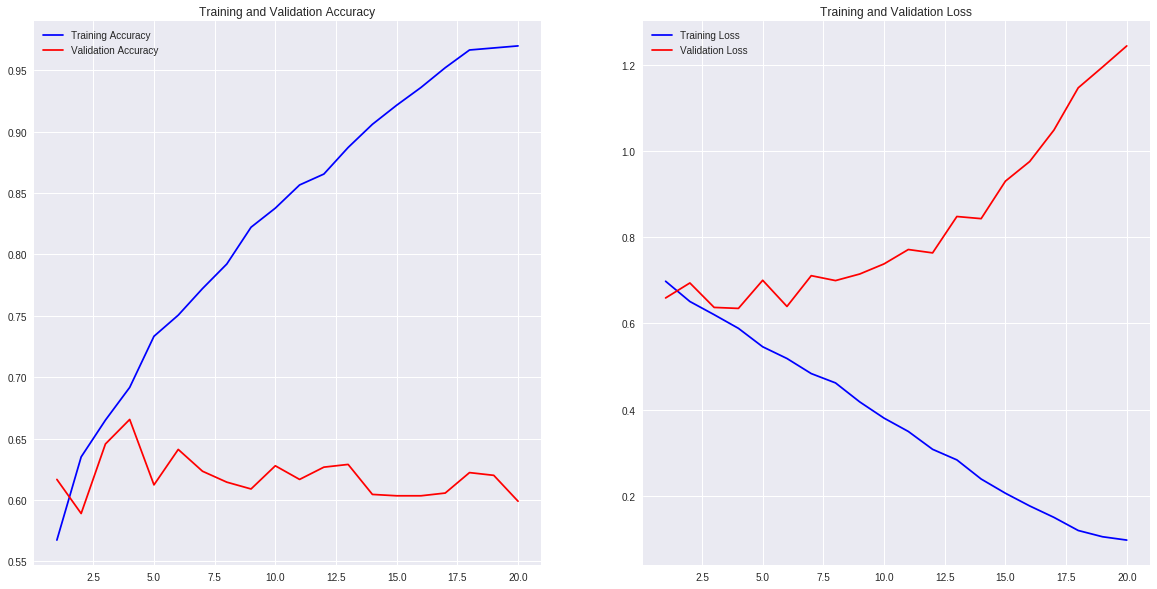

In [25]:
train_accuracy = train_hist.history['acc']
val_accuracy = train_hist.history['val_acc']
train_loss = train_hist.history['loss']
val_loss = train_hist.history['val_loss']

epochs = range(1,len(train_accuracy)+1)

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(1,2,1)
plt.plot(epochs,train_accuracy,'blue',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'red',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

ax = fig.add_subplot(1,2,2)
plt.plot(epochs,train_loss,'blue',label='Training Loss')
plt.plot(epochs,val_loss,'red',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

**Visualize the activation layers for examples in the training dataset**


In [0]:
from keras import models

# Extract the outputs of the 3 Convnet layers
model_layer_outputs = [layer.output for layer in model.layers[:5]]

# Creates a model to return the outputs given the model input
activation_model = models.Model(inputs=model.input,outputs=model_layer_outputs)

# With the input test images, predict the outputs for each layer activation
activations = activation_model.predict_generator(train_gen,steps=34)

['conv2d_1', 'conv2d_2', 'conv2d_3']


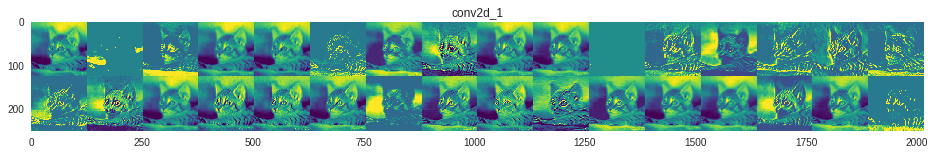

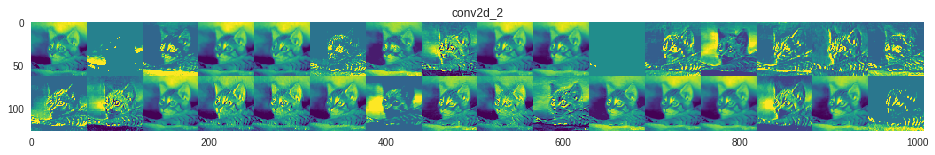

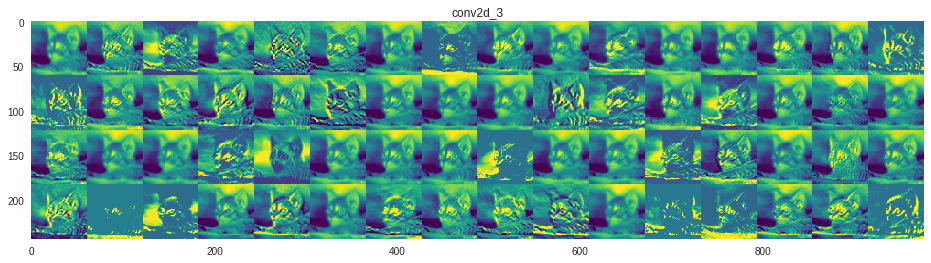

In [44]:
# Record the names of Conv layers
layer_name = [layer.name for layer in model.layers[:5]]
layer_names = [layer_name[0],layer_name[2],layer_name[4]]
print(layer_names)

# Set number of channels displayed in a row
images_per_row = 16

# The loop to display all channels
for layer_name, layer_activation in zip(layer_names, activations):
  # Number of features in a feature map
  n_features = layer_activation.shape[-1] 
  # Size of the feature map
  size = layer_activation.shape[1]
  
  # Calculate the number of columns to display
  n_cols = n_features // image_per_row
  # Set up the display gird matrix
  disply_grid = np.zeros((size*n_cols,images_per_row*size))
  
  for col in range(n_cols):
    for row in range(image_per_row):
      channel_image = layer_activation[0,:,:,col*images_per_row+row]
      # Operations to make the visualization better
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image,0,255).astype('uint8')
      # Display the grid
      disply_grid[col*size:(col+1)*size, row*size:(row+1)*size] = channel_image
      
  scale = 1.0/size
  plt.figure(figsize=(scale*disply_grid.shape[1],scale*disply_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(disply_grid,aspect='auto',cmap='viridis')

**Overfitting Problem**

It is very clear that the overfitting problem exists. I should say that the dataset I use here is not good enough. There are too many images in the middle space which could be good quality or bad quality in some point. However, even the data has such a problem, there are ways to deal with the overfitting problem in computer vision tasks, including data-augmentation generators and dropout during the Convnet training.

I will come back to this later.